### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

資料筆數: 847
欄位: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

前幾筆資料:
      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is beg

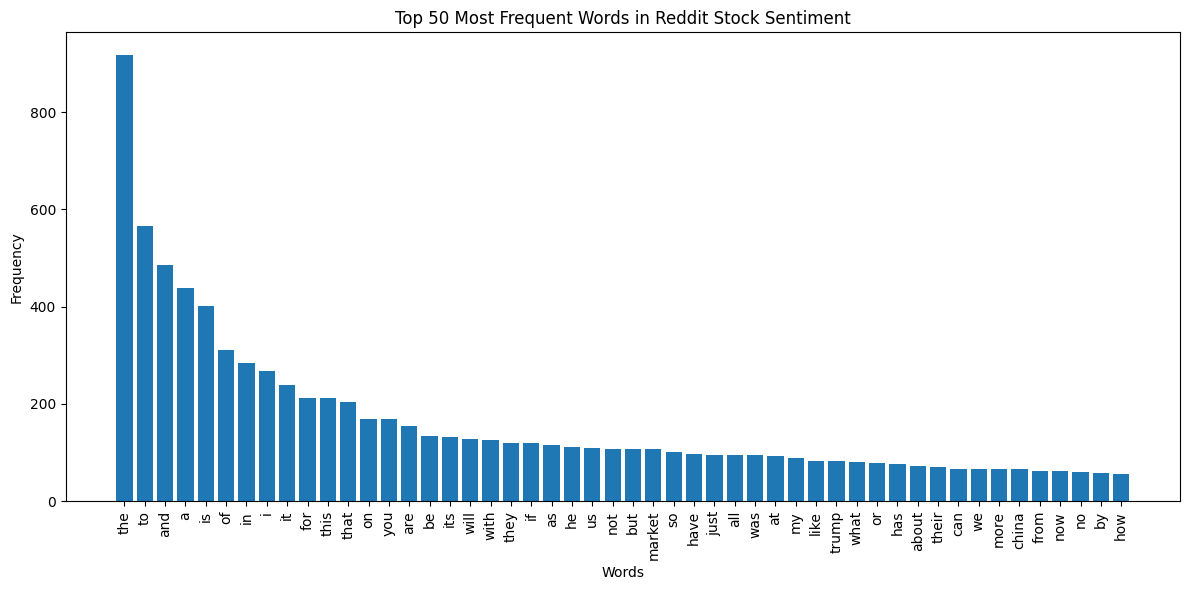

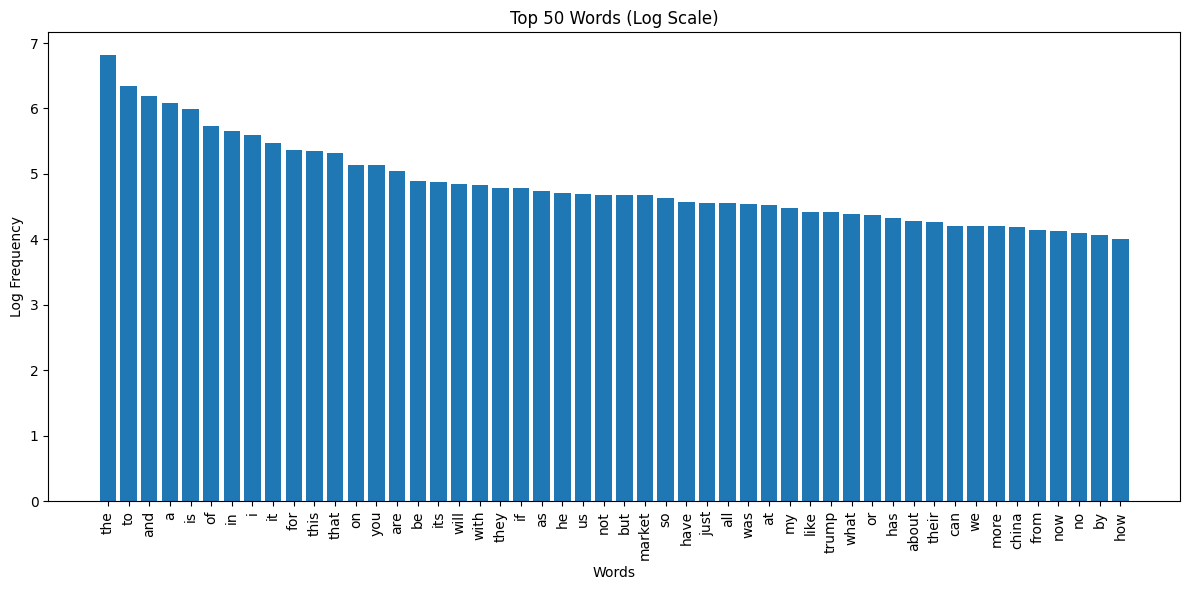

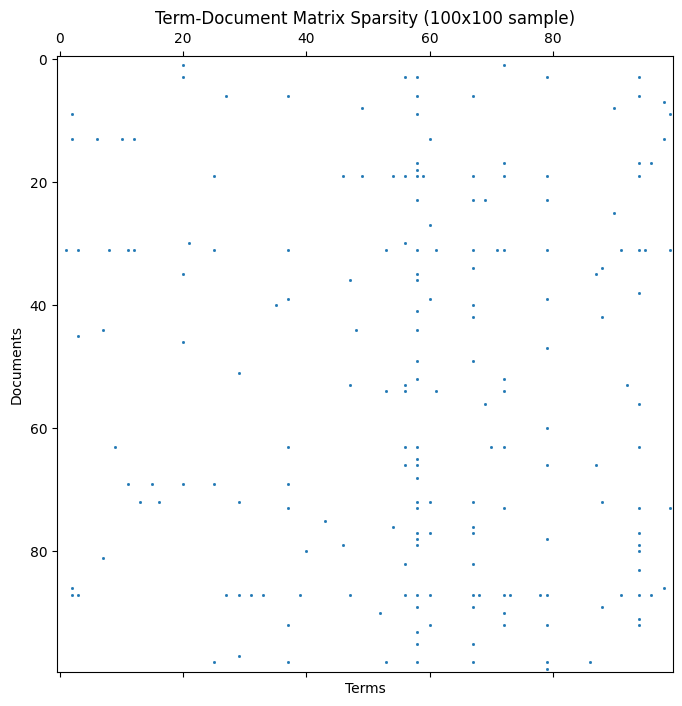

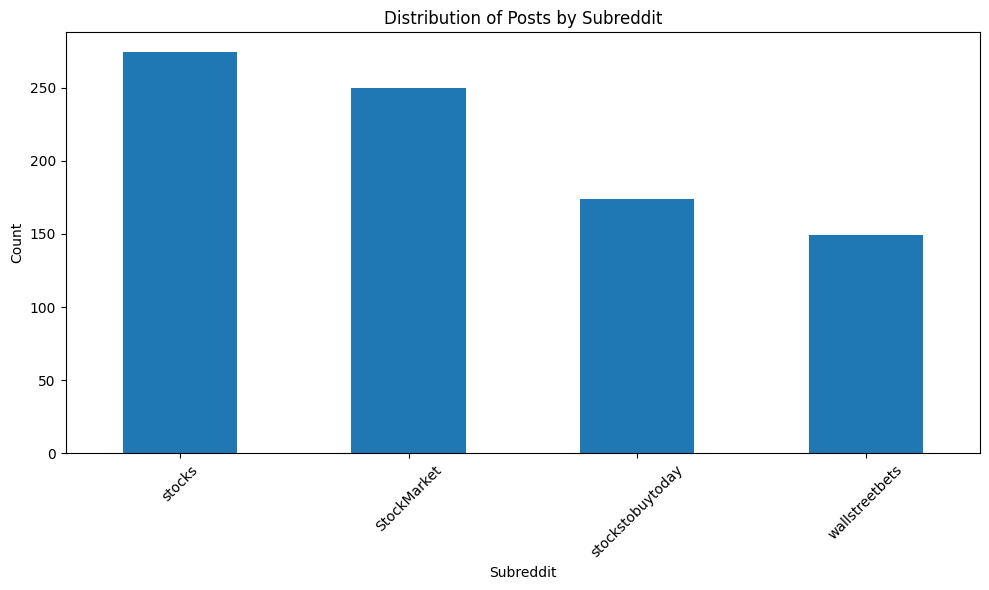

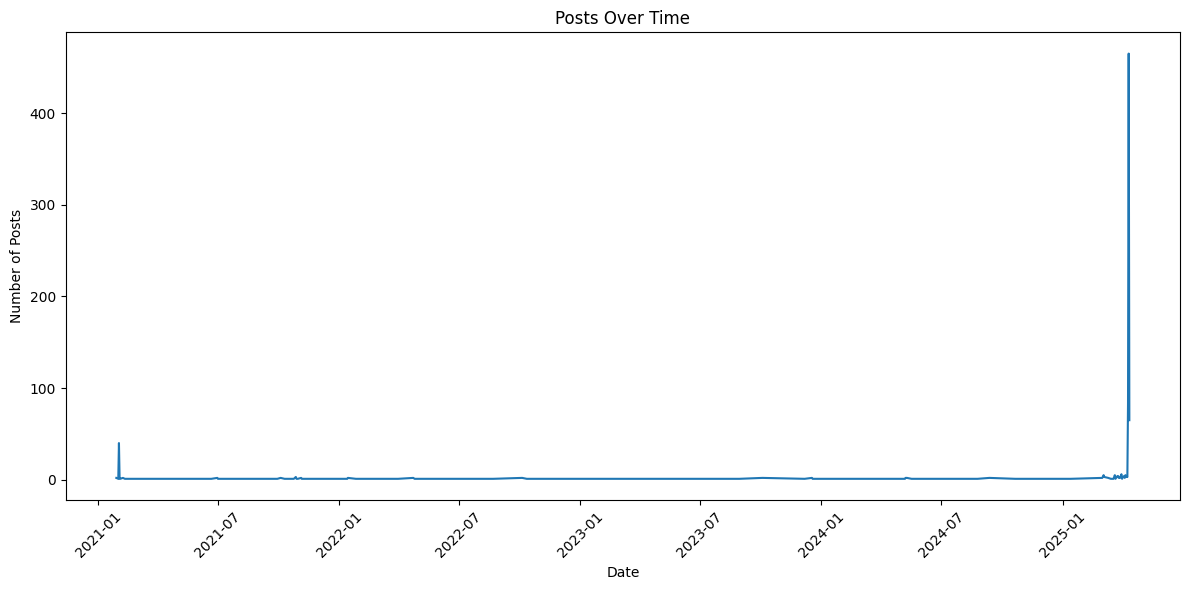

In [2]:
# ===== Phase 1: 用新資料集重做 Exercise 1-15 =====

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Exercise 1-3: 載入和探索資料
url = 'https://raw.githubusercontent.com/leoson-wu/DM2025-Lab1-Exercise/main/newdataset/Reddit-stock-sentiment.csv'
df = pd.read_csv(url)

print(f"資料筆數: {len(df)}")
print(f"欄位: {df.columns.tolist()}")
print(f"\n前幾筆資料:")
print(df.head())

# 檢查缺失值
print(f"\n缺失值:")
print(df.isnull().sum())

# 檢查 label 分布（情感標籤）
print(f"\nLabel 分布:")
print(df['label'].value_counts())

# Exercise 4-6: 文字預處理
# 使用之前的 helper functions
def simple_tokenize(text):
    """簡單的斷詞函數"""
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

# 對所有文字做 tokenization
df['tokens'] = df['text'].apply(simple_tokenize)

# Exercise 7-9: 建立詞彙表和計算詞頻
all_tokens = []
for tokens in df['tokens']:
    all_tokens.extend(tokens)

# 計算詞頻
word_freq = Counter(all_tokens)
print(f"\n總共有 {len(word_freq)} 個不同的詞")
print(f"最常見的 10 個詞: {word_freq.most_common(10)}")

# Exercise 10-12: Term-Document Matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)  # 只取前 1000 個詞
X = vectorizer.fit_transform(df['text'])
print(f"\nTerm-Document Matrix 大小: {X.shape}")

# Exercise 13-15: 視覺化
# 1. 詞頻分布圖
top_words = word_freq.most_common(50)
words, freqs = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(range(len(words)), freqs)
plt.xticks(range(len(words)), words, rotation=90)
plt.title('Top 50 Most Frequent Words in Reddit Stock Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. 對數轉換後的分布
freqs_log = np.log(freqs)
plt.figure(figsize=(12, 6))
plt.bar(range(len(words)), freqs_log)
plt.xticks(range(len(words)), words, rotation=90)
plt.title('Top 50 Words (Log Scale)')
plt.xlabel('Words')
plt.ylabel('Log Frequency')
plt.tight_layout()
plt.show()

# 3. 稀疏矩陣視覺化
plt.figure(figsize=(10, 8))
plt.spy(X[:100, :100], markersize=1)
plt.title('Term-Document Matrix Sparsity (100x100 sample)')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.show()


# ===== 新的資料視覺化 =====

# 1. 情感分析：不同情感的詞頻差異
positive_texts = df[df['label'] == 1.0]['text']
negative_texts = df[df['label'] == -1.0]['text']
neutral_texts = df[df['label'] == 0.0]['text']

# 2. Subreddit 分布
plt.figure(figsize=(10, 6))
df['subreddit'].value_counts().plot(kind='bar')
plt.title('Distribution of Posts by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. 時間序列分析
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
daily_counts = df.groupby('date').size()
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here